다음은 서울정보소통광장 홈페이지에 게시되어 있는 관광숙박업 등록 현황 데이터이다.<br>

- 해당 데이터를 토대로 이미지 시각화를 진행하여라

In [21]:
#패키지 참조
from pandas import read_excel,DataFrame #파이썬 데이터 분석과 조작을 위한 라이브러리 /  엑셀 파일을 읽어와서 데이터프레임으로 변환하는 기능을 제공 / 행과 열로 구성된 2차원의 자료구조로, 표 형태의 데이터를 다룰 때 유용
import numpy # 과학적 계산을 위한 라이브러리로, 다차원 배열과 행렬 연산에 대한 기능을 제공
import folium # 지도 시각화를 위한 라이브러리로, Leaflet.js와 상호작용 가능
from matplotlib import pyplot # 데이터 시각화를 위한 라이브러리로, 다양한 그래프와 차트 형식으로 데이터를 시각화 가능
import seaborn # 간단하게 통계적 그래프와 색상 팔레트 등을 적용하여 보다 세련된 시각화 가능
from IPython.display import SVG # IPython 환경에서 SVG 이미지 출력을 지원하는 클래스
from bs4 import BeautifulSoup # 웹 스크래핑 및 HTML/XML 문서 파싱에 사용되는 라이브러리
import requests #HTTP 요청을 보내고 응답을 받기 위한 라이브러리
import sys

### 데이터 전처리

In [22]:
#데이터 불러오기, csv파일은 encoding='euc-kr'
df=read_excel("서울시호텔리스트2022년12월기준.xlsx")
df.head()

,번호,지역1_(시도),지역2_(시군구),업종,호텔명_(등록명칭),영업상태_(22.12.31.기준),등급,등급부여일,결정기관,객실수,주소(도로명주소),위도,경도
0,1,서울특별시,종로구,관광호텔업,동대문관광호텔,영업중,2성,43798,한국관광공사,52,"서울특별시 종로구 종로 286 (창신동, 이스턴호텔)",37.570765,127.010427
1,2,서울특별시,종로구,관광호텔업,센추럴,영업중,2성,43530,한국관광공사,78,"서울특별시 종로구 청계천로 137 (장사동, 센트럴관광호텔)",37.568812,126.992885
2,3,서울특별시,종로구,관광호텔업,VATICA HOTEL(바티카 호텔),영업중,1성,43798,한국관광공사,50,"서울특별시 종로구 청계천로 341 (창신동, 삼호호텔)",37.570083,127.015532
3,4,서울특별시,종로구,관광호텔업,동화킴스관광호텔,영업중,2성,43059,한국관광공사,51,"서울특별시 종로구 평창문화로 136 (평창동, 킴스관광호텔)",37.609446,126.975163
4,5,서울특별시,종로구,가족호텔업,오라카이 인사동 스위츠,영업중,4성,NaN,NaN,213,서울특별시 종로구 인사동4길 18 (낙원동),37.572962,126.987332


In [23]:
# 데이터 타입 확인하기
df.dtypes

번호                      int64
지역1_(시도)               object
지역2_(시군구)              object
업종                     object
호텔명_(등록명칭)             object
영업상태_(22.12.31.기준)     object
등급                     object
등급부여일                  object
결정기관                   object
객실수                     int64
주소(도로명주소)              object
위도                    float64
경도                    float64
dtype: object

In [24]:
#결측치가 있는지 확인한다. isna와 sum을 쓰면 결측치 합을 컬럼별로 한번에 확인 할 수 있다.
df.isna().sum()

번호                      0
지역1_(시도)                0
지역2_(시군구)               0
업종                      0
호텔명_(등록명칭)              0
영업상태_(22.12.31.기준)      0
등급                     69
등급부여일                 139
결정기관                  141
객실수                     0
주소(도로명주소)               0
위도                      0
경도                      0
dtype: int64

In [25]:
# 필요없는 정보 제거, 다중 컬럼을 한번에 제거하려면 ()안에 []를 넣고 하나씩 전부 기재, 그 후 axis=1 (1값이 세로 기준) 건다
# 호텔의 밀집도를 확인할 예정이기 때문에 '영업상태_(22.12.31.기준)','등급부여일','등급','결정기관' 4가지 컬럼은 우선 제외하기로 한다.
df1=df.drop(['영업상태_(22.12.31.기준)','등급부여일','등급','결정기관'],axis=1)
df1

,번호,지역1_(시도),지역2_(시군구),업종,호텔명_(등록명칭),객실수,주소(도로명주소),위도,경도
0,1,서울특별시,종로구,관광호텔업,동대문관광호텔,52,"서울특별시 종로구 종로 286 (창신동, 이스턴호텔)",37.570765,127.010427
1,2,서울특별시,종로구,관광호텔업,센추럴,78,"서울특별시 종로구 청계천로 137 (장사동, 센트럴관광호텔)",37.568812,126.992885
2,3,서울특별시,종로구,관광호텔업,VATICA HOTEL(바티카 호텔),50,"서울특별시 종로구 청계천로 341 (창신동, 삼호호텔)",37.570083,127.015532
3,4,서울특별시,종로구,관광호텔업,동화킴스관광호텔,51,"서울특별시 종로구 평창문화로 136 (평창동, 킴스관광호텔)",37.609446,126.975163
4,5,서울특별시,종로구,가족호텔업,오라카이 인사동 스위츠,213,서울특별시 종로구 인사동4길 18 (낙원동),37.572962,126.987332
...,...,...,...,...,...,...,...,...,...
450,451,서울특별시,송파구,관광호텔업,소피텔 앰배서더 서울 호텔 앤 서비스드 레지던스(관광호텔),403,서울특별시 송파구 잠실로 209 KT 송파타워(잠실동),37.513995,127.106685
451,452,서울특별시,강동구,관광호텔업,바고관광호텔,42,서울특별시 강동구 천중로 27 (천호동),37.543801,127.130463
452,453,서울특별시,강동구,관광호텔업,발리(BALI),50,서울특별시 강동구 풍성로 210 (성내동),37.529017,127.134982
453,454,서울특별시,강동구,관광호텔업,하모니관광호텔,81,서울특별시 강동구 천중로40길 63 (길동),37.538233,127.138069


In [26]:
# 번호 컬럼을 인덱스로 잡는다.
df1.set_index("번호")

,지역1_(시도),지역2_(시군구),업종,호텔명_(등록명칭),객실수,주소(도로명주소),위도,경도
번호,,,,,,,,
1,서울특별시,종로구,관광호텔업,동대문관광호텔,52,"서울특별시 종로구 종로 286 (창신동, 이스턴호텔)",37.570765,127.010427
2,서울특별시,종로구,관광호텔업,센추럴,78,"서울특별시 종로구 청계천로 137 (장사동, 센트럴관광호텔)",37.568812,126.992885
3,서울특별시,종로구,관광호텔업,VATICA HOTEL(바티카 호텔),50,"서울특별시 종로구 청계천로 341 (창신동, 삼호호텔)",37.570083,127.015532
4,서울특별시,종로구,관광호텔업,동화킴스관광호텔,51,"서울특별시 종로구 평창문화로 136 (평창동, 킴스관광호텔)",37.609446,126.975163
5,서울특별시,종로구,가족호텔업,오라카이 인사동 스위츠,213,서울특별시 종로구 인사동4길 18 (낙원동),37.572962,126.987332
...,...,...,...,...,...,...,...,...
451,서울특별시,송파구,관광호텔업,소피텔 앰배서더 서울 호텔 앤 서비스드 레지던스(관광호텔),403,서울특별시 송파구 잠실로 209 KT 송파타워(잠실동),37.513995,127.106685
452,서울특별시,강동구,관광호텔업,바고관광호텔,42,서울특별시 강동구 천중로 27 (천호동),37.543801,127.130463
453,서울특별시,강동구,관광호텔업,발리(BALI),50,서울특별시 강동구 풍성로 210 (성내동),37.529017,127.134982


In [27]:
# 기초통계량 확인

df.describe()

,번호,객실수,위도,경도
count,455.000000,455.000000,455.000000,455.000000
mean,228.000000,130.395604,37.541977,126.982994
std,131.491445,137.429556,0.037363,0.066968
min,1.000000,6.000000,37.449021,126.802516
25%,114.500000,40.000000,37.513178,126.928486
50%,228.000000,73.000000,37.552280,126.988577
75%,341.500000,188.500000,37.564628,127.029343
max,455.000000,1151.000000,37.685143,127.138069


In [28]:
# 특별히 기초통계량에서 유의미한 결과는 확인 할 수 없다

In [29]:
# 1)Folium 지도시각화

# zoom_start: 배율 1~22까지 설정가능
# location -> 구글맵에서 특정 위치 검색, 나온 결과 url 메모장에 복사해서
# !3d뒤에 나오는 숫자부터 !4d뒤에 나오는 숫자 각각 복사해서 붙여넣으면 됨(위도,경도 개념)

#기본위치는 서울 시청으로 잡았음
map_osm=folium.Map(location=[37.5666612,126.9783785],zoom_start=19)
map_osm

In [30]:
# zoom_start: 배율 1~22
map_osm=folium.Map(location=[37.566651, 126.978428],zoom_start=11)

html="<font color='green' style='white-space:nowrap'><b>%s</b></font>"

#데이터프레임의 행 수만큼 반복하면서 마커 생성
for i in df1.index:
    #행 우선 접근 방식으로 값 추출하기
    name=df1.loc[i,'호텔명_(등록명칭)']
    lat=df1.loc[i,'위도']
    lng=df1.loc[i,'경도']

    #추출한 정보를 지도에 표시
    popup_html=folium.Popup(html%name,parse_html=False)
    marker=folium.Marker([lat,lng],popup=popup_html)
    marker.add_to(map_osm)

map_osm.save('map_osm2.html') # 지도시각화 저장
map_osm
# 총 455개의 호텔 및 호스텔 위치 데이터가 지도에 표시되었음

알 수 있는 사실:<br>
해당 데이터를 확인 결과 관광 특구인 강남과 중구에 숙박시설이 많이 밀집되어있는 것을 볼 수 있음

In [31]:
# 2)도수분포표

# 주소(도로명주소) 라는 컬럼에서 문자열 데이터를 split(자르기) 후에 공백을 기준으로 2번째 열만 선택 
gu=df1['주소(도로명주소)'].str.split(" ",expand=True)[1]

# assign함수 이용하여 'gu'컬럼을 '구'로 변경해서 추가
df2=df1.assign(행정구=gu)
df2

,번호,지역1_(시도),지역2_(시군구),업종,호텔명_(등록명칭),객실수,주소(도로명주소),위도,경도,행정구
0,1,서울특별시,종로구,관광호텔업,동대문관광호텔,52,"서울특별시 종로구 종로 286 (창신동, 이스턴호텔)",37.570765,127.010427,종로구
1,2,서울특별시,종로구,관광호텔업,센추럴,78,"서울특별시 종로구 청계천로 137 (장사동, 센트럴관광호텔)",37.568812,126.992885,종로구
2,3,서울특별시,종로구,관광호텔업,VATICA HOTEL(바티카 호텔),50,"서울특별시 종로구 청계천로 341 (창신동, 삼호호텔)",37.570083,127.015532,종로구
3,4,서울특별시,종로구,관광호텔업,동화킴스관광호텔,51,"서울특별시 종로구 평창문화로 136 (평창동, 킴스관광호텔)",37.609446,126.975163,종로구
4,5,서울특별시,종로구,가족호텔업,오라카이 인사동 스위츠,213,서울특별시 종로구 인사동4길 18 (낙원동),37.572962,126.987332,종로구
...,...,...,...,...,...,...,...,...,...,...
450,451,서울특별시,송파구,관광호텔업,소피텔 앰배서더 서울 호텔 앤 서비스드 레지던스(관광호텔),403,서울특별시 송파구 잠실로 209 KT 송파타워(잠실동),37.513995,127.106685,송파구
451,452,서울특별시,강동구,관광호텔업,바고관광호텔,42,서울특별시 강동구 천중로 27 (천호동),37.543801,127.130463,강동구
452,453,서울특별시,강동구,관광호텔업,발리(BALI),50,서울특별시 강동구 풍성로 210 (성내동),37.529017,127.134982,강동구
453,454,서울특별시,강동구,관광호텔업,하모니관광호텔,81,서울특별시 강동구 천중로40길 63 (길동),37.538233,127.138069,강동구


In [32]:
#추가된 "구" 컬럼을 이용하여 각 행정구별 숙박업소(호텔,호스텔) 갯수 확인해보기
cdf=DataFrame(df2.filter(['행정구']).value_counts(),columns=['count']).reset_index()
cdf

,행정구,count
0,중구,103
1,강남구,63
2,종로구,42
3,영등포구,39
4,송파구,22
5,마포구,22
6,강서구,20
7,관악구,15
8,구로구,14
9,용산구,14


In [33]:
# cdf['count'] 열의 데이터를 이용하여 히스토그램을 생성. bins=5로 설정하여 5개의 구간으로 나눔
# hist: 각 구간(bin)에 속하는 데이터 개수를 담은 배열 / bins: 구간(bin)의 경계값을 담은 배열
hist,bins=numpy.histogram(cdf['count'],bins=5)
hist,bins

info=[]
for i,v in enumerate(hist): #해당 구문 적용안하면 마지막 문구도 미만으로 나옴
    if i +1<len(hist):
        tpl="%d이상 %d미만"
    else:
        tpl="%d이상 %d이하"
    
    cls=tpl%(bins[i],bins[i+1])
    line={"숙박업소_수":cls,"행정구역의_수":v}
    info.append(line)

hist_df=DataFrame(info)
hist_df.set_index('숙박업소_수',inplace=True)
hist_df

,행정구역의_수
숙박업소_수,
1이상 21미만,19
21이상 41미만,3
41이상 62미만,1
62이상 82미만,1
82이상 103이하,1


In [34]:
# 확인 결과, 1 이상 21 미만의 숙박업소 수를 가진 행정구는 총 19개로 압도적으로 집중되어 있음을 확인할 수 있습니다.
# 이를 바탕으로 추론해 볼 수 있는 점은, 해당 19개 행정구는 숙박시설이 상대적으로 부족한 지역임을 암시하고 있습니다.
# 반면에 나머지 상위 2개 구간인 62 이상부터 82 미만 및 82 이상부터 103 이하에 해당하는 행정구(총 2곳)에서는
# 숙박업소가 주로 분포되어 있는 것을 관찰할 수 있습니다.

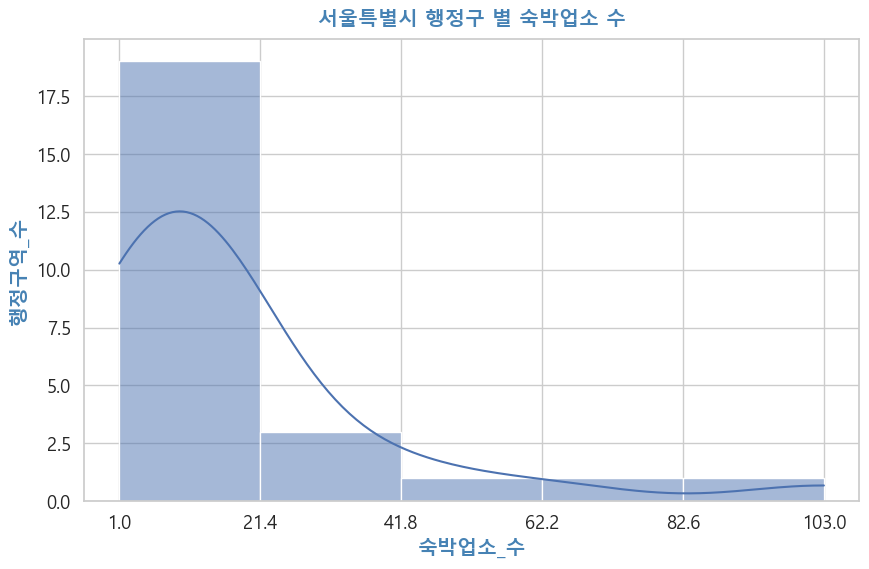

In [35]:
# 3)히스토그램 시각화

# 히스토그램 시각화를 하기 위해 그래프 세팅(한글폰트,폰트사이즈,차트사이즈,음수표시설정)

pyplot.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
pyplot.rcParams["font.size"] = 12
pyplot.rcParams["figure.figsize"] = (10, 6)
pyplot.rcParams["axes.unicode_minus"] = False

pyplot.figure()
seaborn.set_theme(style='whitegrid', font='Malgun Gothic', font_scale=1.2)
seaborn.histplot(data=cdf,x='count',bins=5,kde=True)
# 소수점 표시를 줄이기 위해 for문을 사용하여 bins에 있는 값을 하나씩 읽어와서 "{:.1f}".format(b)와 같이 포맷팅을 수행한 후,
# 그 결과를 리스트로 만들어 눈금 레이블로 사용.
pyplot.xticks(bins, ["{:.1f}".format(b) for b in bins])
pyplot.title("서울특별시 행정구 별 숙박업소 수", pad=10,color='steelblue',fontweight='bold')
pyplot.xlabel("숙박업소_수",color='steelblue',fontweight='bold')
pyplot.ylabel("행정구역_수",color='steelblue',fontweight='bold')
pyplot.show()
pyplot.close()

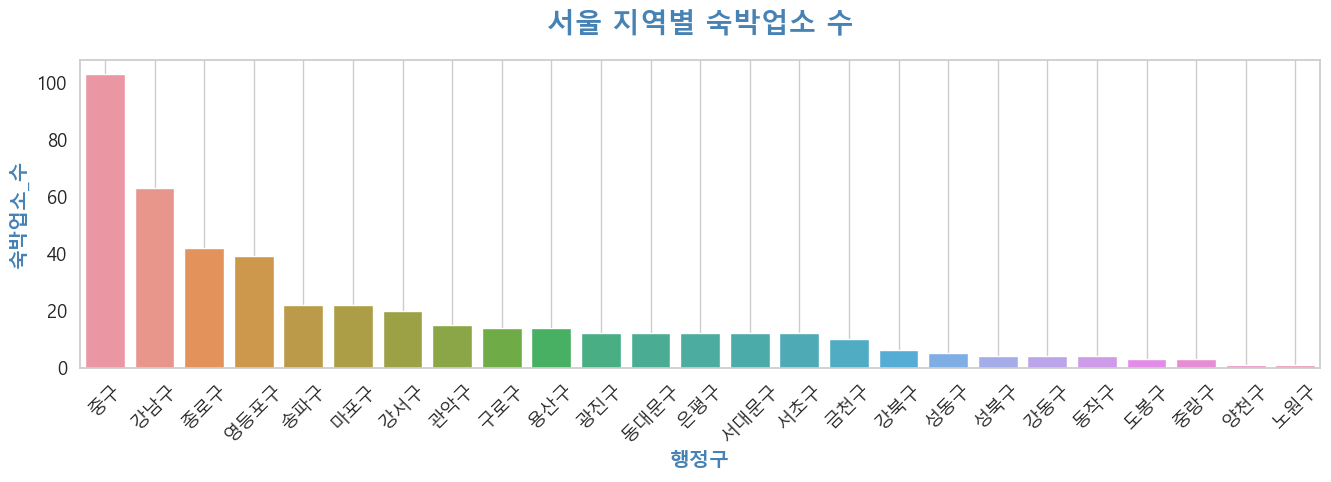

In [36]:
   # seaborn 막대그래프 활용하여 시각화 진행

pyplot.rcParams["figure.figsize"]=(16,4)
pyplot.figure()
pyplot.title("서울 지역별 숙박업소 수",pad=20,color='steelblue',fontsize=20,fontweight='bold')
seaborn.barplot(data=cdf,x=cdf['행정구'],y=cdf['count'])
pyplot.xlabel("행정구",color='steelblue',fontweight='bold')
pyplot.ylabel("숙박업소_수",color='steelblue',fontweight='bold')
pyplot.xticks(rotation=45) # x축 레이블(텍스트)각도 조절
pyplot.grid()
pyplot.show()
pyplot.close()

In [37]:
# 확인 결과, 중구에 가장 많은 숙박업소가 있으며 그 다음으로 강남구, 종로구 순으로 보여진다.

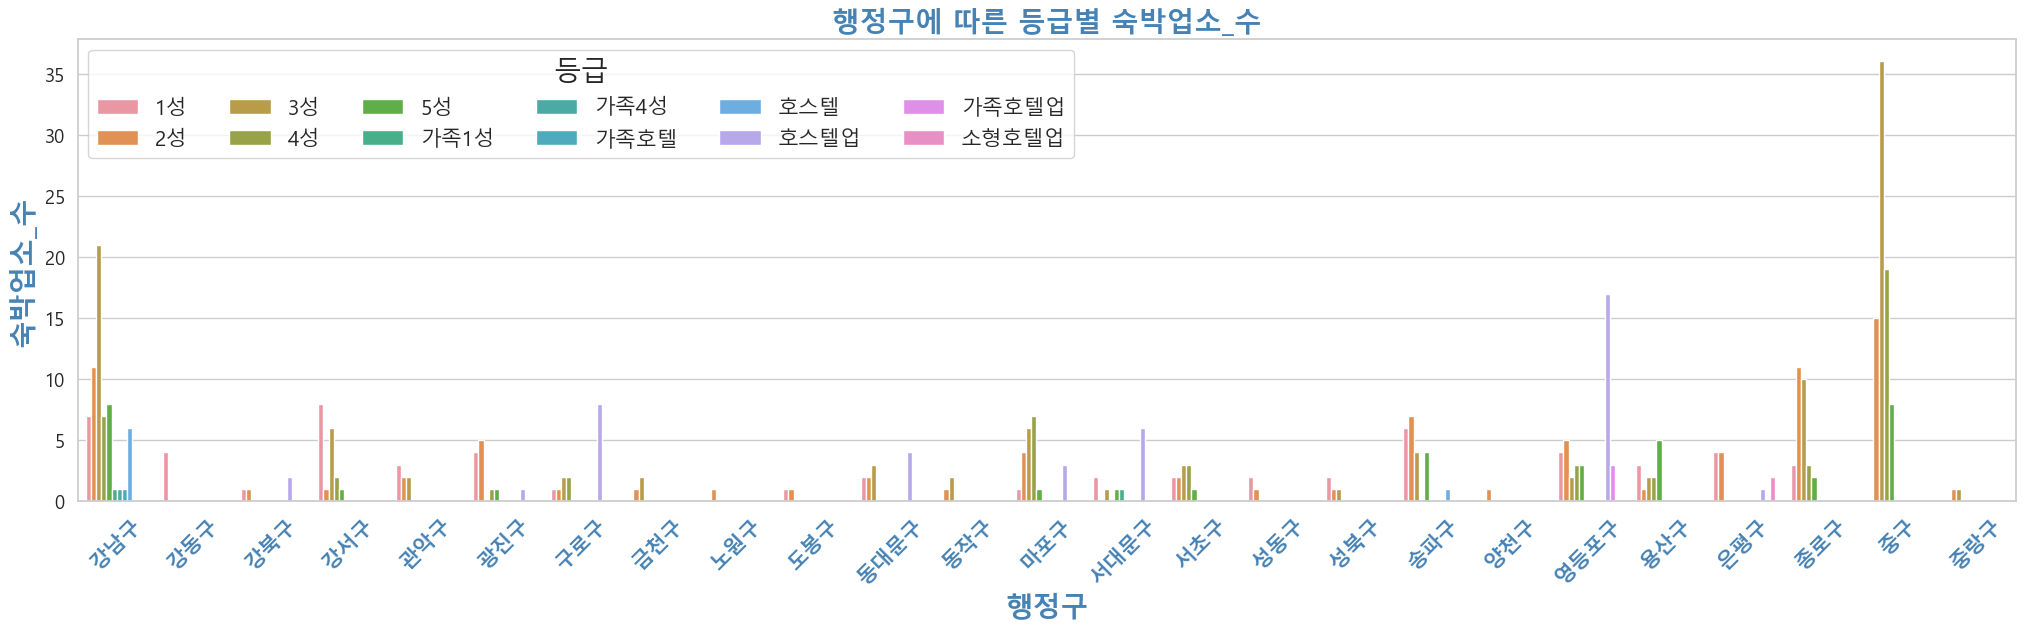

In [38]:
# 4)막대그래프 시각화 (2)

df_cleaned = df.dropna(subset=['등급'])

# 지역과 등급에 따른 호텔 수 계산
df_grouped = df_cleaned.groupby(['지역2_(시군구)', '등급']).size().reset_index(name='호텔수')

# 막대그래프 그리기
pyplot.figure(figsize=(25, 6))
seaborn.barplot(x='지역2_(시군구)', y='호텔수', hue='등급', data=df_grouped)
pyplot.title('행정구에 따른 등급별 숙박업소_수',color='steelblue',fontsize=20,fontweight='bold')
pyplot.xlabel('행정구',color='steelblue',fontsize=20,fontweight='bold')
pyplot.ylabel('숙박업소_수',color='steelblue',fontsize=20,fontweight='bold')
pyplot.xticks(rotation=45,fontsize=15,color='steelblue',fontweight='bold')  # rotation: x축 레이블 회전 (필요한 경우)
# 범례 사이즈 조절
pyplot.legend(title='등급', title_fontsize='20', fontsize='15',loc='upper left',ncol=6) #loc: 범례 위치 / ncol:범례 열 나누기
pyplot.show()
pyplot.close()

In [ ]:
# 행정구에 따른 등급별 숙박업소_수를 확인할 수 있는 그래프이다.
# 여기서 알 수 있는 사실은 3성급 호텔은 중구에 가장 많이 집중되어있으며 영등포구에는 호스텔업이 압도적으로 많은 것을 알 수 있다.
# 5성급 호텔의 경우 숙박업소 밀집도가 가장 높은 중구, 강남구에 많이 있는것으로 확인된다.


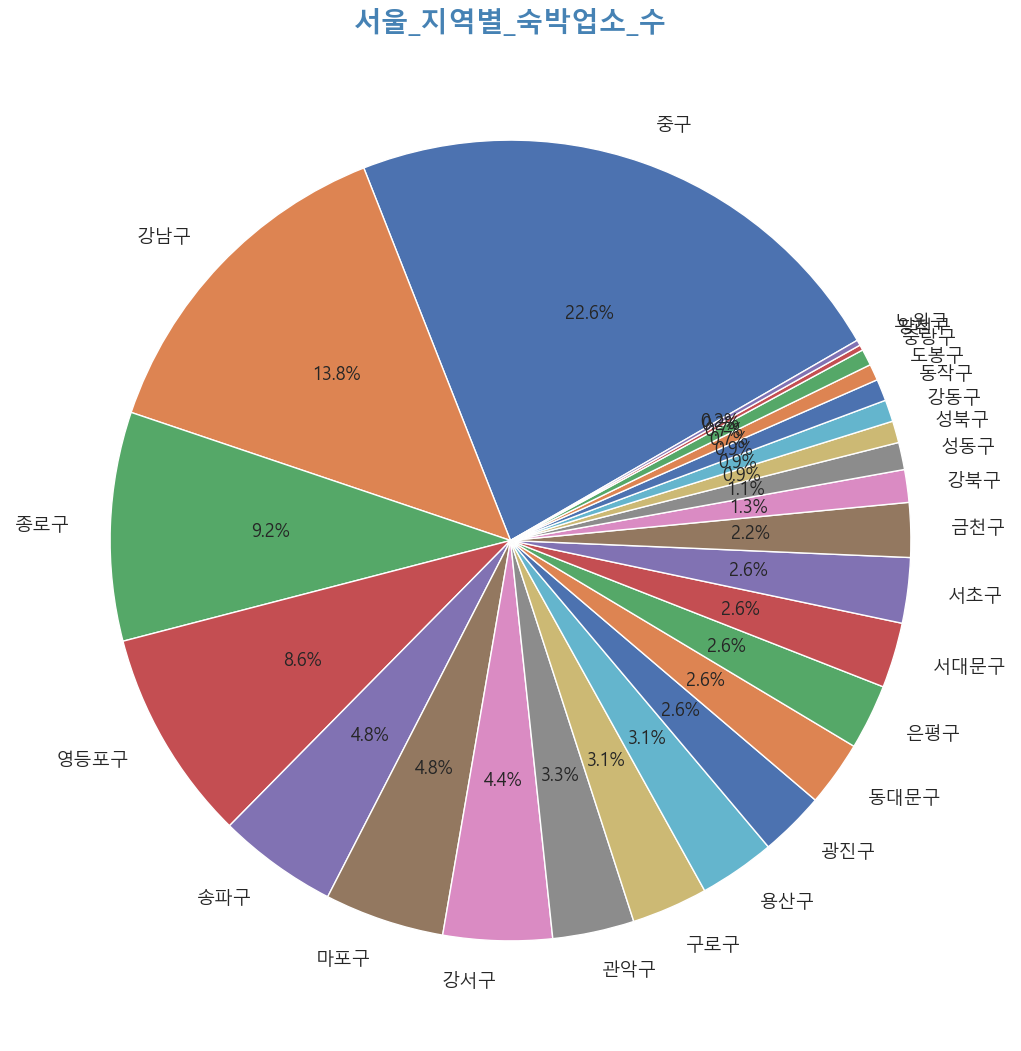

In [39]:
# 5)파이차트 시각화

colors = ['tomato', 'coral', 'orangered', 'darkorange', 'salmon','lime', 'limegreen', 'chartreuse', 'greenyellow']
pyplot.rcParams["font.size"] = 13
pyplot.rcParams["figure.figsize"] = (13, 13)
pyplot.figure()
pyplot.title("서울_지역별_숙박업소_수",color='steelblue',fontweight='bold',fontsize=20)
pyplot.pie(cdf['count'], labels=cdf['행정구'], autopct='%0.1f%%',startangle=30)
pyplot.show()
pyplot.close()

C:\Users\kiman\AppData\Local\Temp\ipykernel_18344\787317860.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf_filtered.loc[len(cdf_filtered)] = ['1%미만 행정구', small_sum]


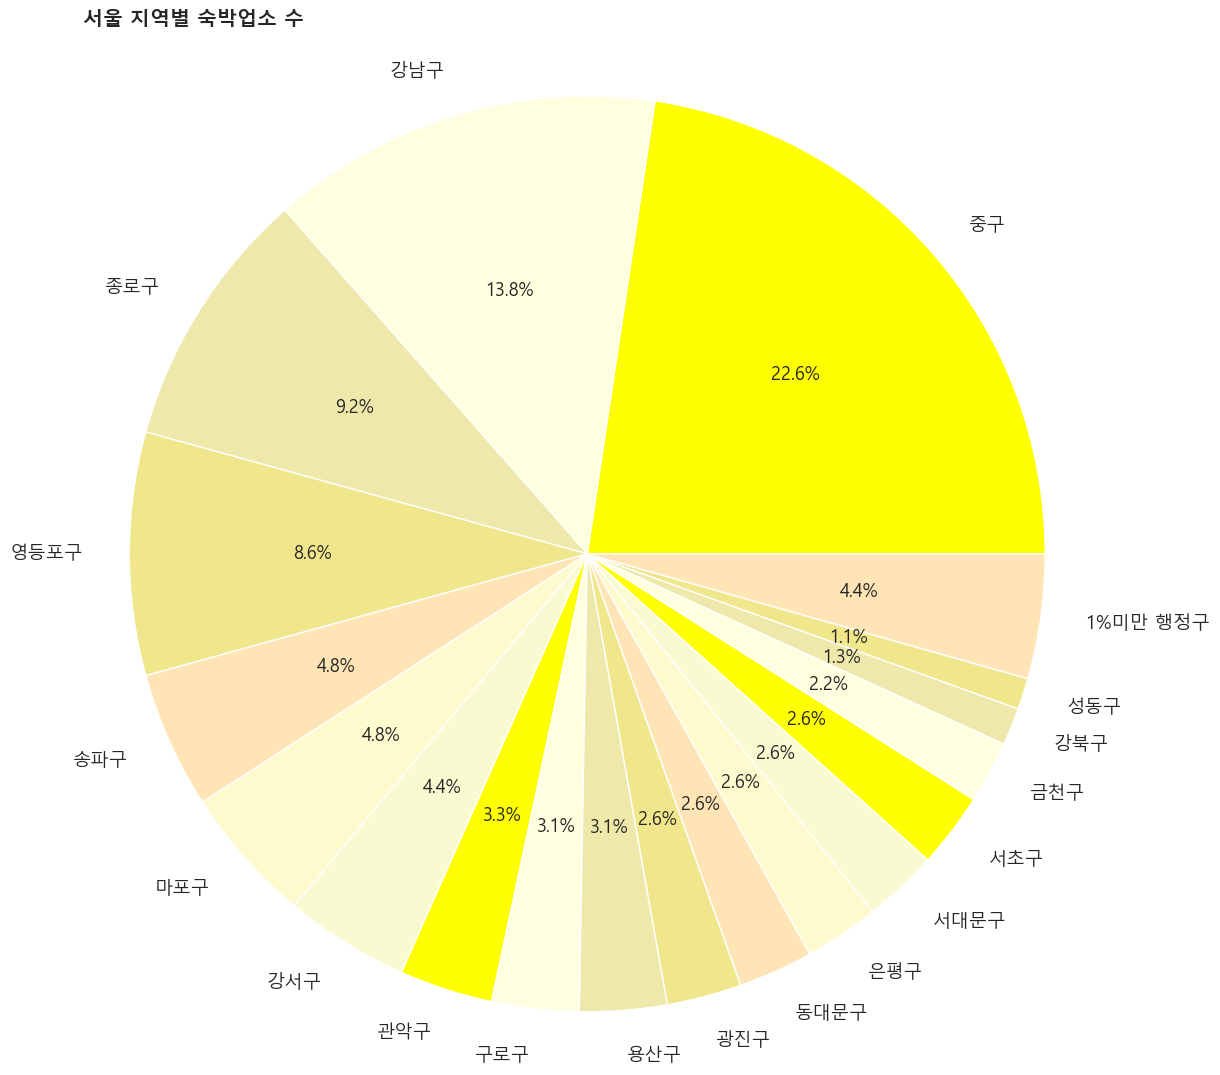

In [40]:
# 5)파이차트 시각화(2)

# 1%미만 데이터가 겹쳐 보여 가독성이 떨어지므로 1%미만 행정구는 데이터를 합쳐서 재시각화

# 작은 비율 찾기
threshold = 5  # 작은 비율 임계값 (1% 미만)
small_values = cdf[cdf['count'] < threshold]  # 작은 값 필터링

# 작은 값들의 합 구하기
small_sum = small_values['count'].sum()

# 기존 데이터프레임에서 작은 값들 제거
cdf_filtered = cdf[~cdf['행정구'].isin(small_values['행정구'])]

# 새로운 '기타' 항목 추가
cdf_filtered.loc[len(cdf_filtered)] = ['1%미만 행정구', small_sum]

# 그래프 출력
colors = ['yellow','lightyellow','palegoldenrod','khaki','moccasin','lemonchiffon','lightgoldenrodyellow']
pyplot.title("서울 지역별 숙박업소 수", loc='left', pad=20, fontweight='bold')
pyplot.pie(cdf_filtered['count'], labels=cdf_filtered['행정구'], colors=colors, autopct='%0.1f%%')
pyplot.axis('equal')
pyplot.show()


In [41]:
# 6)SVG 지도 시각화 

# 지도파일 id값이 영문이므로 값을 통일해야하만 싱크를 맞출 수 있음.
# 엑셀파일 행정 구를 영문으로 변환하기위한 절차 진행

# 영문으로 변환하기 위해 인덱스 리셋 후 리스트 생성하여 값을 집어넣음
cdf2 = cdf.reset_index()

조건 = [
    cdf2['행정구'] == "은평구", 
    cdf2['행정구'] == "영등포구", 
    cdf2['행정구'] == "동대문구", 
    cdf2['행정구'] == "강동구", 
    cdf2['행정구'] == "종로구", 
    cdf2['행정구'] == "강남구", 
    cdf2['행정구'] == "중구", 
    cdf2['행정구'] == "송파구", 
    cdf2['행정구'] == "성동구", 
    cdf2['행정구'] == "서초구", 
    cdf2['행정구'] == "중랑구", 
    cdf2['행정구'] == "노원구", 
    cdf2['행정구'] == "구로구", 
    cdf2['행정구'] == "서대문구", 
    cdf2['행정구'] == "도봉구", 
    cdf2['행정구'] == "성북구", 
    cdf2['행정구'] == "금천구", 
    cdf2['행정구'] == "용산구", 
    cdf2['행정구'] == "관악구", 
    cdf2['행정구'] == "광진구", 
    cdf2['행정구'] == "강서구", 
    cdf2['행정구'] == "강북구", 
    cdf2['행정구'] == "마포구",
    cdf2['행정구'] == "양천구",
    cdf2['행정구'] == "동작구",
]

값 = ["Eunpyeong-gu","Yeongdeungpo-gu", "Dongdaemun-gu","Gangdong-gu",
    "Jongno-gu","Gangnam-gu","Jung-gu","Songpa-gu","Seongdong-gu", 
    "Seocho-gu","Jungnang-gu","Nowon-gu", "Guro-gu","Seodaemun-gu",
    "Dobong-gu", "Seongbuk-gu","Geumcheon-gu","Gwangjin-gu","Yongsan-gu",
    "Gwanak-gu", "Gangseo-gu","Gangbuk-gu","Mapo-gu","Yangcheon-gu",
    "Dongjak-gu"]

# numpy.select 함수를 사용하여 조건에 따라 값을 선택하여 'Gu' 컬럼에 할당
cdf2['Gu'] = numpy.select(조건, 값, default=numpy.nan)

# 영문으로 생성된 Gu 컬럼을 인덱스로 설정
cdf2.set_index('Gu', inplace=True)

# 기존에 있던 구 컬럼은 삭제
cdf2.drop('행정구',axis=1,inplace=True)

# count 컬럼을 "숙박업소_수"로 변경
cdf2.rename(columns={'count':'숙박업소_수'},inplace=True)
cdf2



,index,숙박업소_수
Gu,,
Jung-gu,0,103
Gangnam-gu,1,63
Jongno-gu,2,42
Yeongdeungpo-gu,3,39
Songpa-gu,4,22
Mapo-gu,5,22
Gangseo-gu,6,20
Yongsan-gu,7,15
Guro-gu,8,14


c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


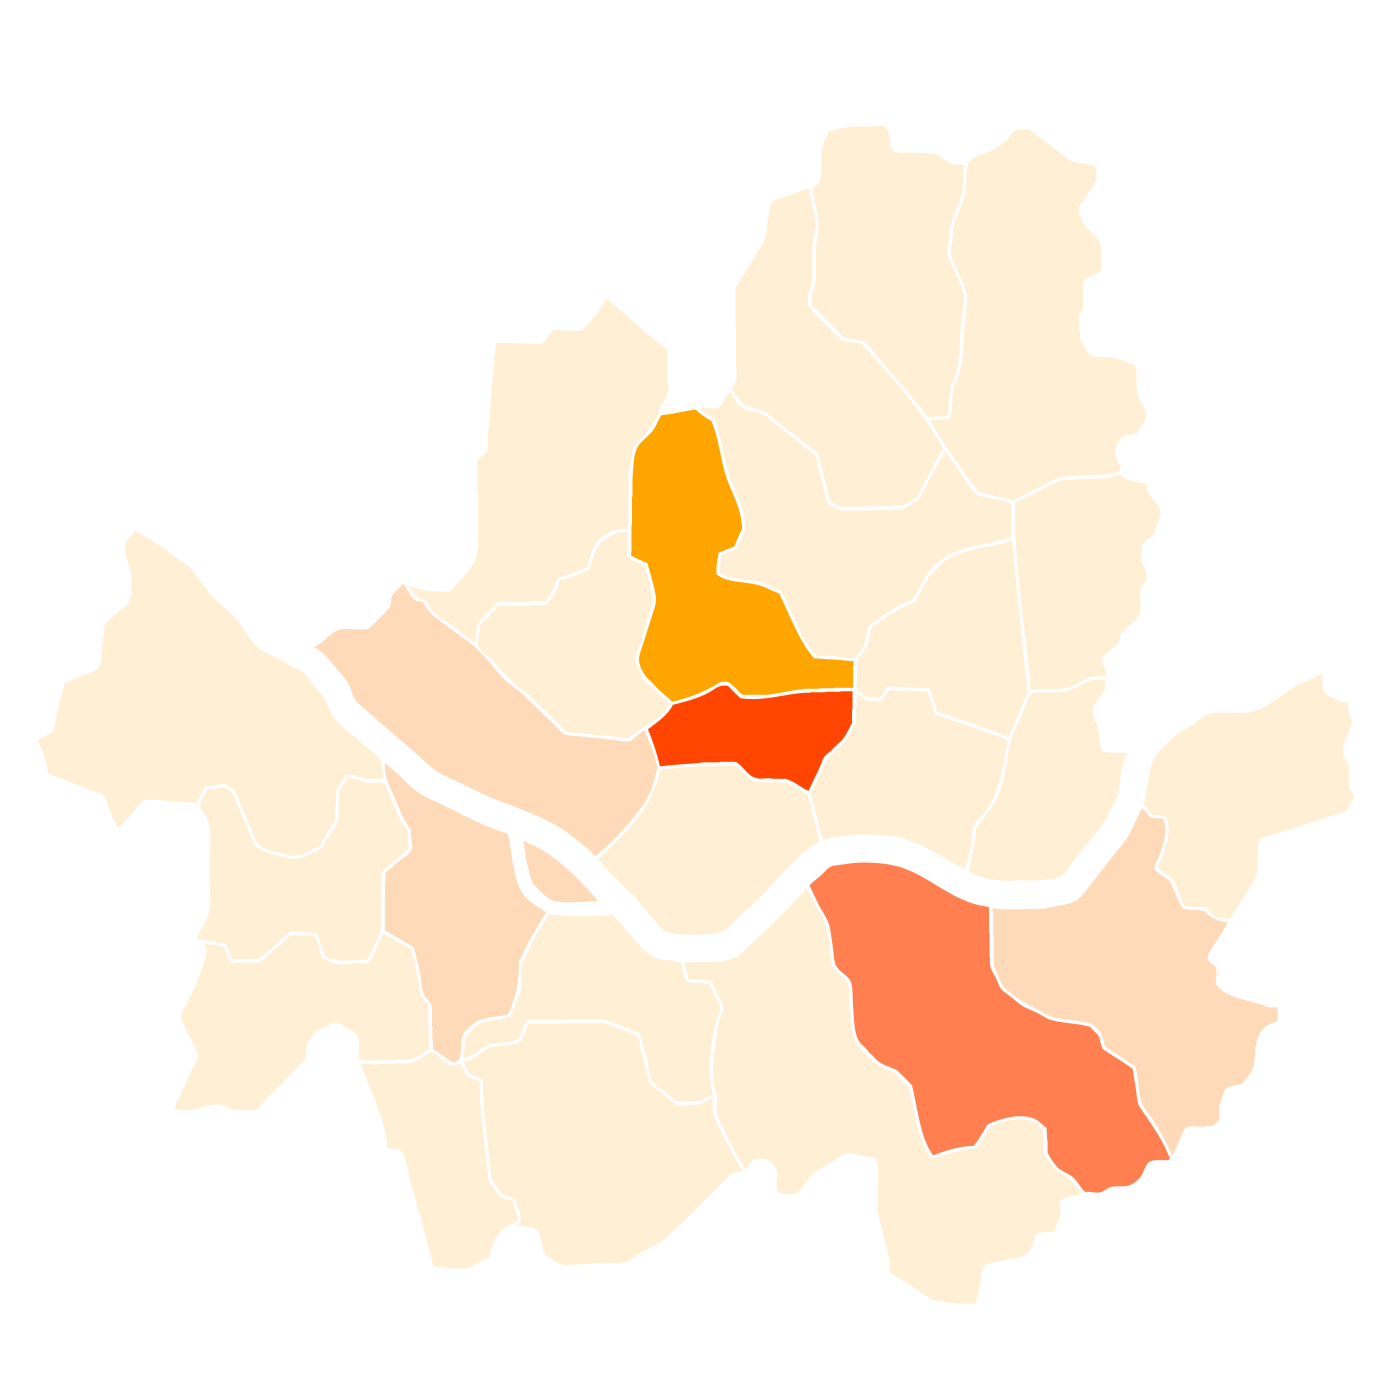

In [42]:
#지도 이미지 가져오기

user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"
header_info = {'User-agent': user_agent, 'referer': None}

r = requests.get('https://data.hossam.kr/D04/map_seoul.svg', headers=header_info)

# 결과 검사
if r.status_code != 200:
    # 에러코드와 에러메시지를 문자열로 구성
    err_msg = "%d %s 에러가 발생했습니다." % (r.status_code, r.reason)
    # 강제로 에러를 발생시킨다.
    raise Exception(err_msg)

map_svg = r.text
# SVG(map_svg)

#지도 이미지 파싱
soup = BeautifulSoup(map_svg)
# soup

#구 단위로 추출
path_list = soup.select('path[id]') 

# 출력 결과는 path 단위를 저장한 리스트
# path_list

#단계별 색상값 지정하기
colors = ["#ffefd5", "#ffdab9", "#ffa500", "#ff7f50", "#ff4500"]

#데이터표에 색상값 컬럼 추가
cdf2['색상값'] = None
# cdf2


# 지도에서 확인한 지명만큼 반복
for p in path_list:
    지역명 = p['id']
    # if 지역명 not in cdf2.index:   # 지도와 행정구 갯수가 매칭이 안되므로 if구문 및 continue를
    #     continue                   # 이용해서 없는 행정구가 있으면 건너뛴다.
    호텔수 = cdf2.loc[지역명, '숙박업소_수']
    # print(지역명, " -->", 숙박업소_수)
    # 히스토그램 분포도수를 참고
    if 호텔수 > 82.6:   color_index = 4
    elif 호텔수 > 62.2: color_index = 3
    elif 호텔수 > 41.8: color_index = 2
    elif 호텔수 > 21.4: color_index = 1
    else: color_index = 0

     # 각 지역별 색상값을 데이터 프레임에 변환
    cdf2.loc[지역명, '색상값'] = colors[color_index]

    # svg 이미지의 면 색상 변경
    p['fill'] = colors[color_index]

# bs4 객체의 내용을 문자열로 리턴
new_seoul_svg = soup.prettify()

# svg 파일 저장
# 저장된 파일은 윈도우 폴더창에서 직접 더블클릭 해서 웹 브라우저를 통해 확인해야 한다.
with open('semi수정본.svg', 'w', encoding="utf-8") as f: #파일명 설정
    f.write(new_seoul_svg)
    
# jupyter에서 svg 이미지 표시하기
# 사용방법 -> SVG(소스문자열) 혹은 SVG(파일경로)
SVG(new_seoul_svg)